**Load the dataset :**

In [61]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
x, y = housing.data, housing.target
print(x.shape, y.shape)

(20640, 8) (20640,)


**Train-Test split :**

In [62]:
from sklearn.model_selection import train_test_split
x_trian,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=20)

**1.Data Preprocessing Using StandardScaler :**



In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_trian = sc.fit_transform(x_trian)
x_test = sc.transform(x_test)



*   **Analytical / Normal Equation :**



 Compute regression coefficients :


In [64]:
import numpy as np
X_train_b = np.c_[np.ones((x_trian.shape[0], 1)), x_trian]
X_test_b  = np.c_[np.ones((x_test.shape[0], 1)), x_test]
w = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train
y_pred_train = X_train_b @ w
y_pred_test  = X_test_b @ w

Function to compute Mean Squared Error :

In [65]:
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

Compute RMSE for test & train :

In [66]:
RMSE_train = RMSE(y_train, y_pred_train)
RMSE_test  = RMSE(y_test,  y_pred_test)
print("RMSE_train:", RMSE_train)
print("RMSE_test:", RMSE_test)

RMSE_train: 0.7216515999034233
RMSE_test: 0.7355308130245344




*   **Gradient Descent :**



In [67]:
def h_w(x, w):
    return w[0] + w[1]*x

 Gradient Descent iterations & learning rates:


In [85]:
epochs = 500
alphas = [0.0001 ,0.001, 0.01, 0.05, 0.1,0.5,0.8,0.9,1]
n_train = len(x_trian)
n_test=len(x_test)

compute RMSE for different alphas :


In [86]:
n_features = x_trian.shape[1]
rmse_train_dict = {}
rmse_test_dict  = {}
for alpha in alphas:
    w = np.zeros(n_features + 1)
    rmse_train_list = []
    rmse_test_list  = []
    for i in range(epochs):
        y_pred_train = w[0] + x_trian @ w[1:]
        y_pred_test  = w[0] + x_test @ w[1:]
        rmse_train_list.append(RMSE(y_train, y_pred_train))
        rmse_test_list.append(RMSE(y_test, y_pred_test))
        Gw0 = np.sum(y_pred_train - y_train) / n_train
        Gw_rest = (x_trian.T @ (y_pred_train - y_train)) / n_train
        w[0] -= alpha * Gw0
        w[1:] -= alpha * Gw_rest
    rmse_train_dict[alpha] = rmse_train_list
    rmse_test_dict[alpha]  = rmse_test_list


plot RMSE vs learning rate to find best alpha :

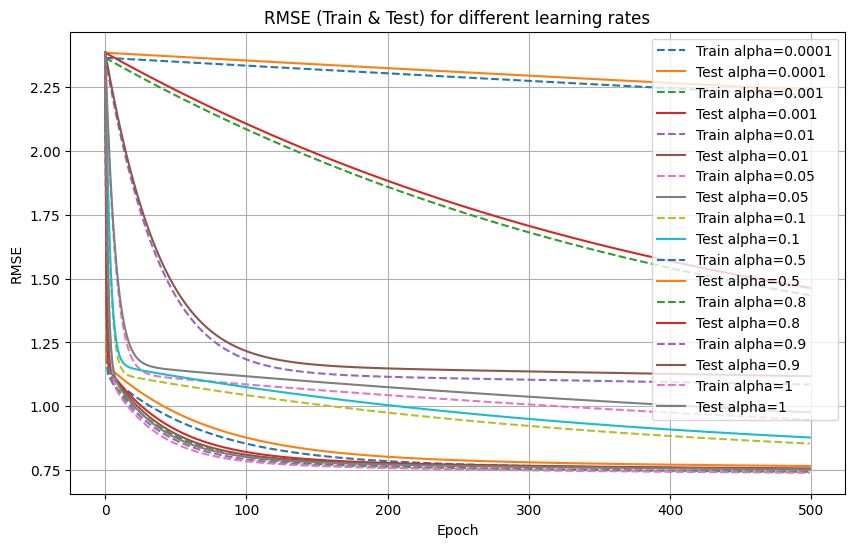

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
for alpha in alphas:
    plt.plot(range(epochs), rmse_train_dict[alpha], '--', label=f'Train alpha={alpha}')
    plt.plot(range(epochs), rmse_test_dict[alpha], '-',  label=f'Test alpha={alpha}')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("RMSE (Train & Test) for different learning rates")
plt.legend()
plt.grid(True)
plt.show()

plot RMSE for different alpha to find best alpha :

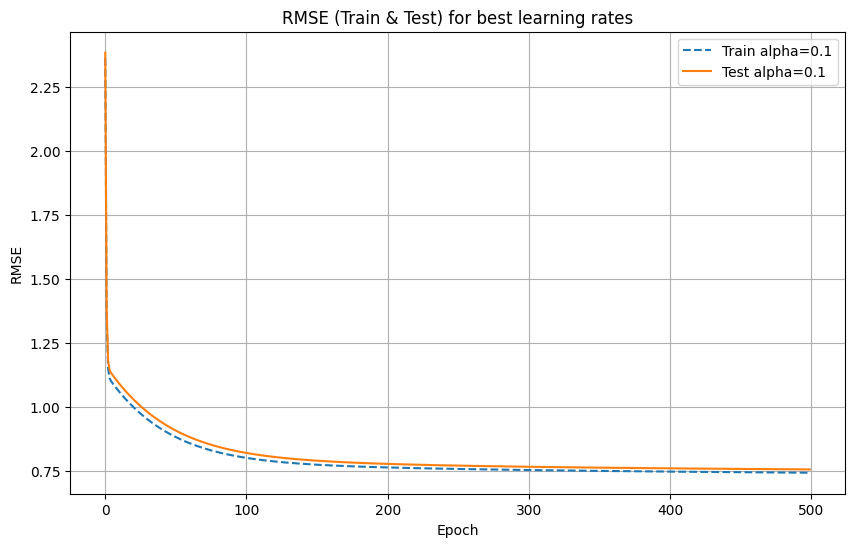

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
alpha=0.8
plt.plot(range(epochs), rmse_train_dict[alpha], '--', label=f'Train alpha={0.1}')
plt.plot(range(epochs), rmse_test_dict[alpha], '-',  label=f'Test alpha={0.1}')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("RMSE (Train & Test) for best learning rates")
plt.legend()
plt.grid(True)
plt.show()

2.**1.Data Preprocessing Using MinMax :**


In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_trian = scaler.fit_transform(x_trian)
x_test  = scaler.transform(x_test)

*   **Analytical / Normal Equation :**

 Compute regression coefficients :


In [90]:
import numpy as np
X_train_b = np.c_[np.ones((x_trian.shape[0], 1)), x_trian]
X_test_b  = np.c_[np.ones((x_test.shape[0], 1)), x_test]
w = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train
y_pred_train = X_train_b @ w
y_pred_test  = X_test_b @ w

Function to compute Mean Squared Error :

In [91]:
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

Compute RMSE for test & train :

In [92]:
RMSE_train = RMSE(y_train, y_pred_train)
RMSE_test  = RMSE(y_test,  y_pred_test)
print("RMSE_train:", RMSE_train)
print("RMSE_test:", RMSE_test)

RMSE_train: 0.7216515999034233
RMSE_test: 0.7355308130245248




*   **Gradient Descent :**



In [93]:
def h_w(x, w):
    return w[0] + w[1]*x

 Gradient Descent iterations & learning rates:


In [97]:
epochs = 500
alphas = [0.0001 ,0.001, 0.01, 0.05, 0.1,0.5,0.8,0.9,1]
n_train = len(x_trian)
n_test=len(x_test)


compute RMSE for different alphas :


In [98]:
n_features = x_trian.shape[1]
rmse_train_dict = {}
rmse_test_dict  = {}
for alpha in alphas:
    w = np.zeros(n_features + 1)
    rmse_train_list = []
    rmse_test_list  = []
    for i in range(epochs):
        y_pred_train = w[0] + x_trian @ w[1:]
        y_pred_test  = w[0] + x_test @ w[1:]
        rmse_train_list.append(RMSE(y_train, y_pred_train))
        rmse_test_list.append(RMSE(y_test, y_pred_test))
        Gw0 = np.sum(y_pred_train - y_train) / n_train
        Gw_rest = (x_trian.T @ (y_pred_train - y_train)) / n_train
        w[0] -= alpha * Gw0
        w[1:] -= alpha * Gw_rest
    rmse_train_dict[alpha] = rmse_train_list
    rmse_test_dict[alpha]  = rmse_test_list


plot RMSE vs learning rate to find best alpha :

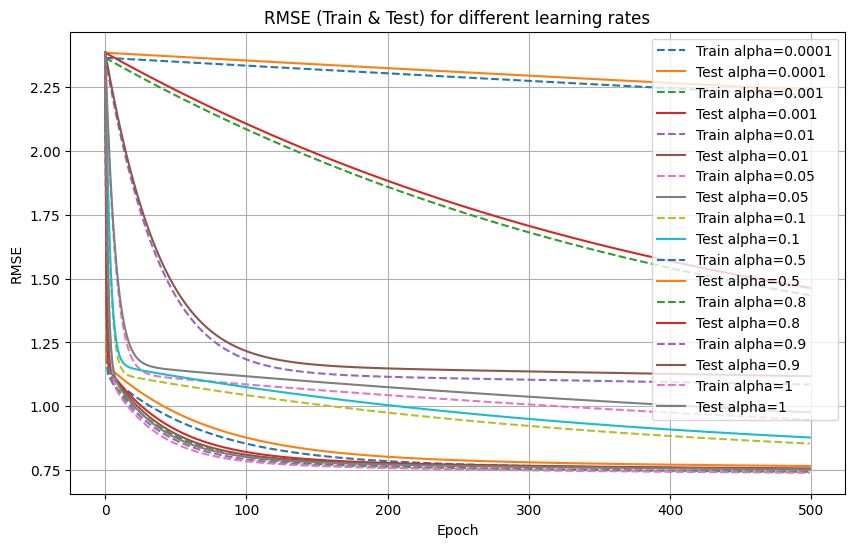

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
for alpha in alphas:
    plt.plot(range(epochs), rmse_train_dict[alpha], '--', label=f'Train alpha={alpha}')
    plt.plot(range(epochs), rmse_test_dict[alpha], '-',  label=f'Test alpha={alpha}')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("RMSE (Train & Test) for different learning rates")
plt.legend()
plt.grid(True)
plt.show()

plot RMSE for different alpha to find best alpha :

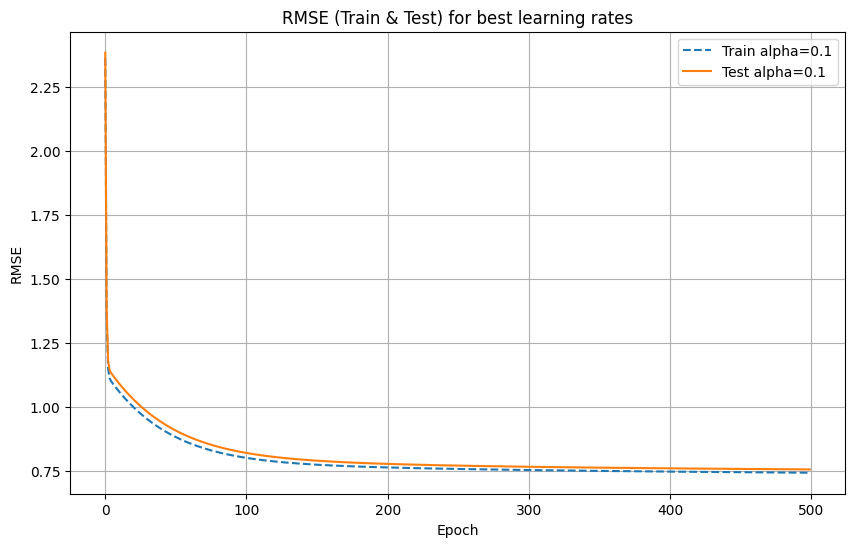

In [100]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
alpha=0.8
plt.plot(range(epochs), rmse_train_dict[alpha], '--', label=f'Train alpha={0.1}')
plt.plot(range(epochs), rmse_test_dict[alpha], '-',  label=f'Test alpha={0.1}')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("RMSE (Train & Test) for best learning rates")
plt.legend()
plt.grid(True)
plt.show()